In [82]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [83]:
data = pd.read_csv('bank-full.csv', header=0, sep=";")

In [84]:
data = data.dropna()
print(data.shape)
print(list(data.columns))

(45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


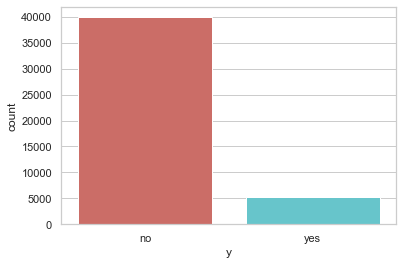

In [85]:
sns.countplot(x="y",data=data, palette='hls')
plt.show()

In [86]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [87]:
data.drop(data.columns[[0,3,5,8,9,10,11,12,13,14]], axis=1, inplace=True)

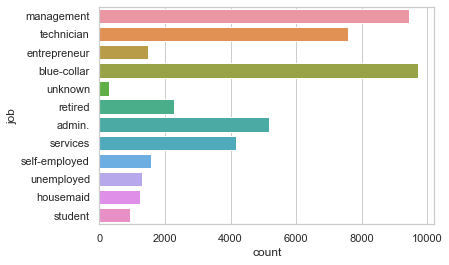

In [88]:
sns.countplot(y="job", data=data)
plt.show()

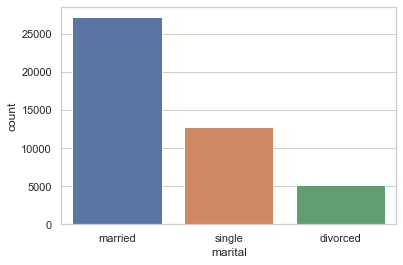

In [89]:
sns.countplot(x="marital", data=data)
plt.show()

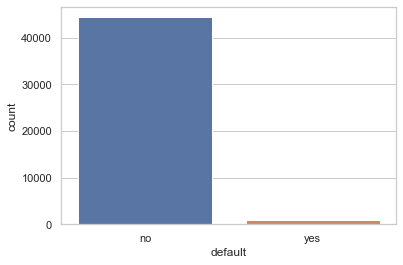

In [90]:
sns.countplot(x="default", data=data)
plt.show()

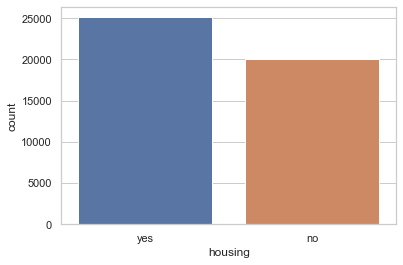

In [91]:
sns.countplot(x="housing", data=data)
plt.show()

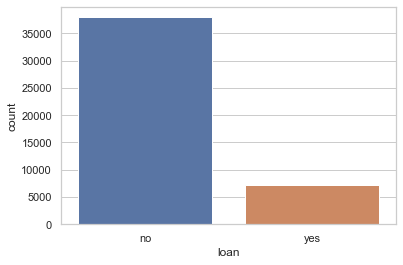

In [92]:
sns.countplot(x="loan", data=data)
plt.show()

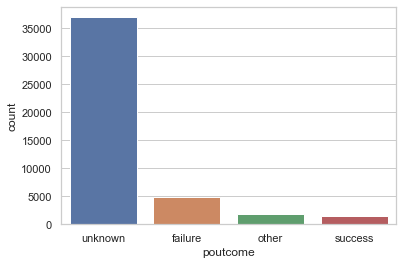

In [93]:
sns.countplot(x="poutcome", data=data)
plt.show()

In [94]:
data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [95]:
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [96]:
data2.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,no,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,no,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
2,no,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,no,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
4,no,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1


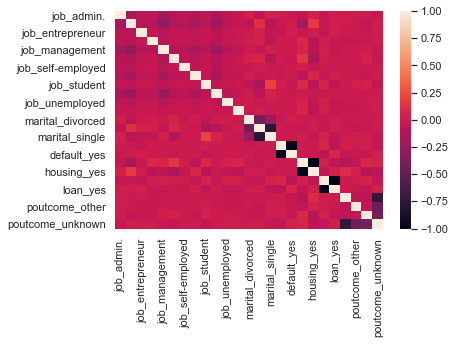

In [97]:
sns.heatmap(data2.corr())
plt.show()

In [105]:
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [106]:
X_train.shape

(33908, 25)

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [109]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9852  126]
 [1107  218]]


In [110]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      9978
         yes       0.63      0.16      0.26      1325

    accuracy                           0.89     11303
   macro avg       0.77      0.58      0.60     11303
weighted avg       0.87      0.89      0.86     11303



In [113]:
# Of the entire test set, 87% of the promoted term deposit were the term deposit that the customers liked.
# Of the entire test set, 89% of the customer’s preferred term deposits that were promoted.